In [1]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)
suppressMessages(library(Seurat))
suppressMessages(library(SingleCellExperiment))

In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 12)

##################################
### load rheMac10 ArchR genome ###
GENOMEDIR='/home/bnphan/resources/genomes/rheMac10'
load(file.path(GENOMEDIR,'rheMac10_liftoff_GRCh38.p13_ArchR_annotations.rda'))

Setting default number of Parallel threads to 12.



In [3]:
PROJDIR='../../../data/tidy_data/ArchRProjects'
proj = loadArchRProject(file.path(PROJDIR,'ArchR_Multiome_DLPFC'), showLogo = FALSE)
projNeuron = loadArchRProject(file.path(PROJDIR,'ArchR_Multiome_DLPFC_neuron'), showLogo = FALSE)
projGlia = loadArchRProject(file.path(PROJDIR,'ArchR_Multiome_DLPFC_glia'), showLogo = FALSE)

Successfully loaded ArchRProject!

Successfully loaded ArchRProject!

Successfully loaded ArchRProject!



# Add predictedRNA2ATAC co-clustering labels from sub-analyses

In [4]:
df_Neuron = getCellColData(projNeuron)
df_Glia = getCellColData(projGlia)

columns = names(getCellColData(projGlia))
df_label = rbind(df_Neuron[,columns],df_Glia[,columns] )
head(df_label)

DataFrame with 6 rows and 24 columns
                                        Sample TSSEnrichment ReadsInTSS
                                   <character>     <numeric>  <numeric>
London_DLPFC-1#TGCTAACAGTCAGTAC London_DLPFC-1         7.687       3125
London_DLPFC-1#GCAATGAAGCACGATT London_DLPFC-1         9.095       3918
London_DLPFC-1#TGCTTGCTCGCAAACT London_DLPFC-1         10.86       4404
London_DLPFC-1#TGGATTCAGTAACGAG London_DLPFC-1         8.115       3213
London_DLPFC-1#GAGCTGCTCCGCCTAT London_DLPFC-1         9.947       3687
London_DLPFC-1#TATCACGCAATCATGT London_DLPFC-1        10.469       3944
                                ReadsInPromoter     PromoterRatio    PassQC
                                      <numeric>         <numeric> <numeric>
London_DLPFC-1#TGCTAACAGTCAGTAC           19852 0.102250836981715         1
London_DLPFC-1#GCAATGAAGCACGATT           24096 0.126219186405875         1
London_DLPFC-1#TGCTTGCTCGCAAACT           25357 0.133471944415202         1
London_

In [7]:
## transfer labels via cell barcodes
proj <- addCellColData(ArchRProj = proj, data = df_label$predictedGroup_RNA2ATACCo,
    cells = rownames(df_label), name = "predictedGroup_RNA2ATACCo")

## subset to cells with integrated labels
idxPass <- which(!is.na(proj$predictedGroup_RNA2ATACCo) & 
                 proj$predictedGroup_RNA2ATACCo != 'Drop' & # doublet cluster
                 proj$ClustersH230_ATAC != 'C19') # junk cluster
cellsPass <- proj$cellNames[idxPass]
proj = proj[cellsPass, ]

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1a4642a53994-Date-2021-09-01_Time-22-08-27.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1a4642a53994-Date-2021-09-01_Time-22-08-27.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1a464392a471-Date-2021-09-01_Time-22-08-39.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1a464392a471-Date-2021-09-01_Time-22-08-39.log



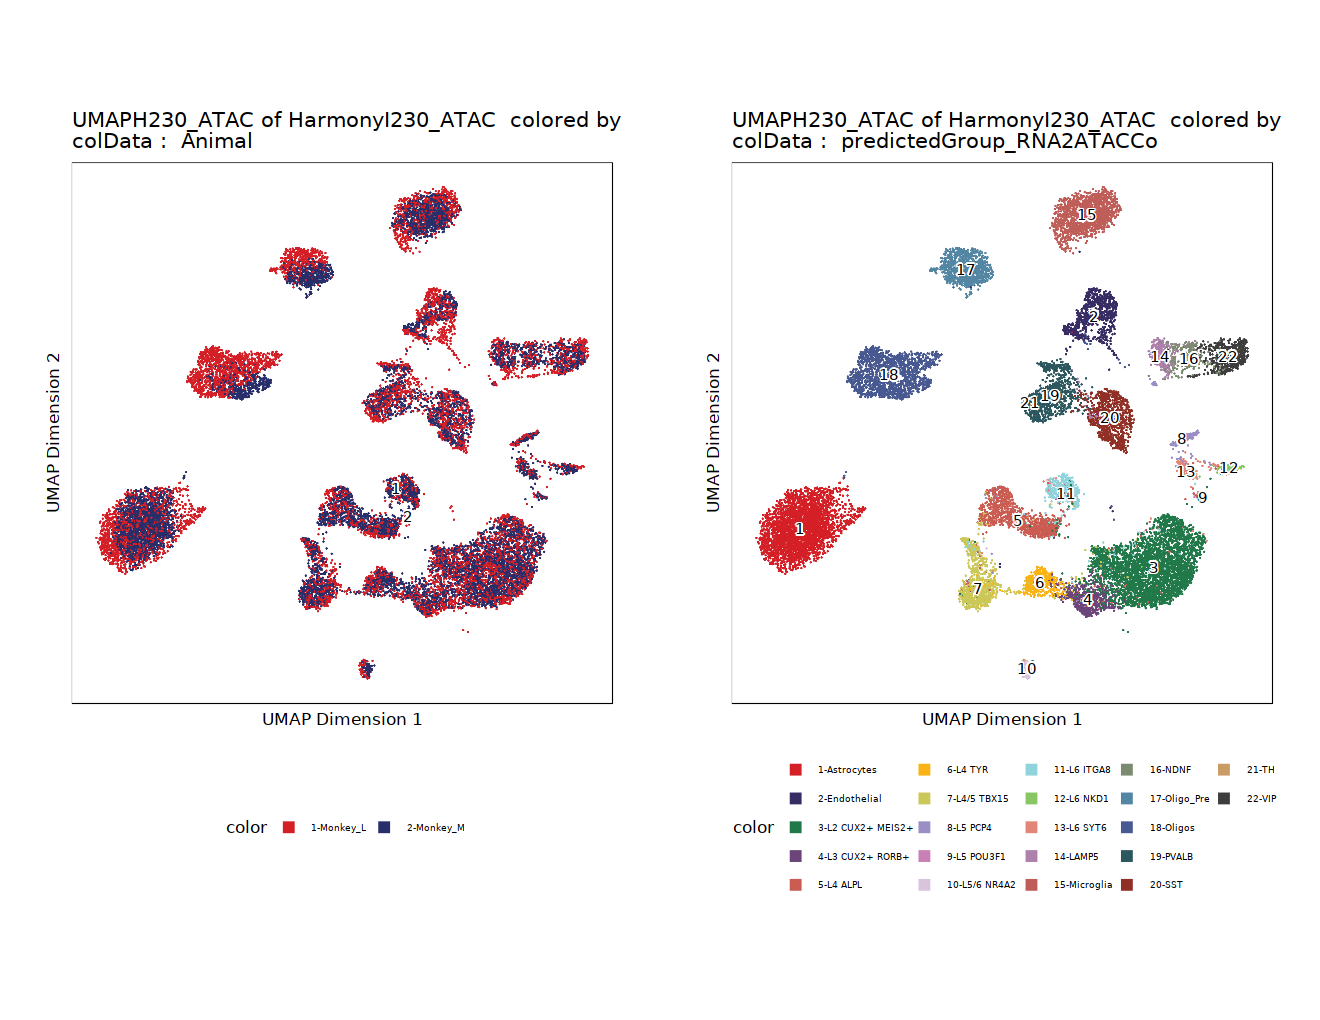

In [8]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Animal", embedding = "UMAPH230_ATAC")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "predictedGroup_RNA2ATACCo", embedding = "UMAPH230_ATAC")


ggAlignPlots(p1, p2,  type = "h")

In [13]:
table(proj$predictedGroup_RNA2ATACCo)


     Astrocytes     Endothelial L2 CUX2+ MEIS2+  L3 CUX2+ RORB+         L4 ALPL 
           3235             788            3614             533            1137 
         L4 TYR      L4/5 TBX15         L5 PCP4       L5 POU3F1      L5/6 NR4A2 
            472             913             206              30             133 
       L6 ITGA8         L6 NKD1         L6 SYT6           LAMP5       Microglia 
            511             137             222             311            1454 
           NDNF       Oligo_Pre          Oligos           PVALB             SST 
            297             930            1655             892             866 
             TH             VIP 
              4             554 

In [14]:
proj = saveArchRProject(ArchRProj = proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

# Call peaks using integrated clusters

In [ ]:
# make group coverage, call peaks, and 
# proj<-addGroupCoverages(proj, groupBy="predictedGroup_RNA2ATACCo", minReplicates = 2, maxReplicates = 12, force = TRUE)

In [ ]:
# call peaks 
# proj<-addReproduciblePeakSet(proj, groupBy = "predictedGroup_RNA2ATACCo", plot = FALSE, genomeSize = 2.7e9)

In [ ]:
# add peak counts matrix 
# proj <- addPeakMatrix(proj)

In [ ]:
# proj = saveArchRProject(ArchRProj = proj)

In [ ]:
# add motif enrichment matrix
# proj <- addMotifAnnotations(ArchRProj = proj, motifSet = "JASPAR2018", name = "Motif")

In [ ]:
# # add motif deviations matrix
# proj <- addBgdPeaks(proj)
# proj <- addDeviationsMatrix(proj,  peakAnnotation = "Motif", force = TRUE)

In [ ]:
# add co-accessibility matrix
# proj <- addCoAccessibility(proj, reducedDims = "HarmonyI230_ATAC", dimsToUse = 1:30,
#                            scaleDims = TRUE, corCutOff = 0.75, k = 100, 
#                            knnIteration = 500, overlapCutoff = 0.8, 
#                            maxDist = 1e+05, scaleTo = 10^4, log2Norm = TRUE)

In [ ]:
# proj = saveArchRProject(ArchRProj = proj)

In [ ]:
# proj <- addPeak2GeneLinks(
#     ArchRProj = proj,
#     useMatrix = "GeneExpressionMatrix",
#     reducedDims = "HarmonyI230_ATAC"
# )
# proj = saveArchRProject(ArchRProj = proj)